## Gradient Descent 
    is a technique to find the optmised solution for the given f(x). 
<br> Useful when it comes to find global maxima or minima.

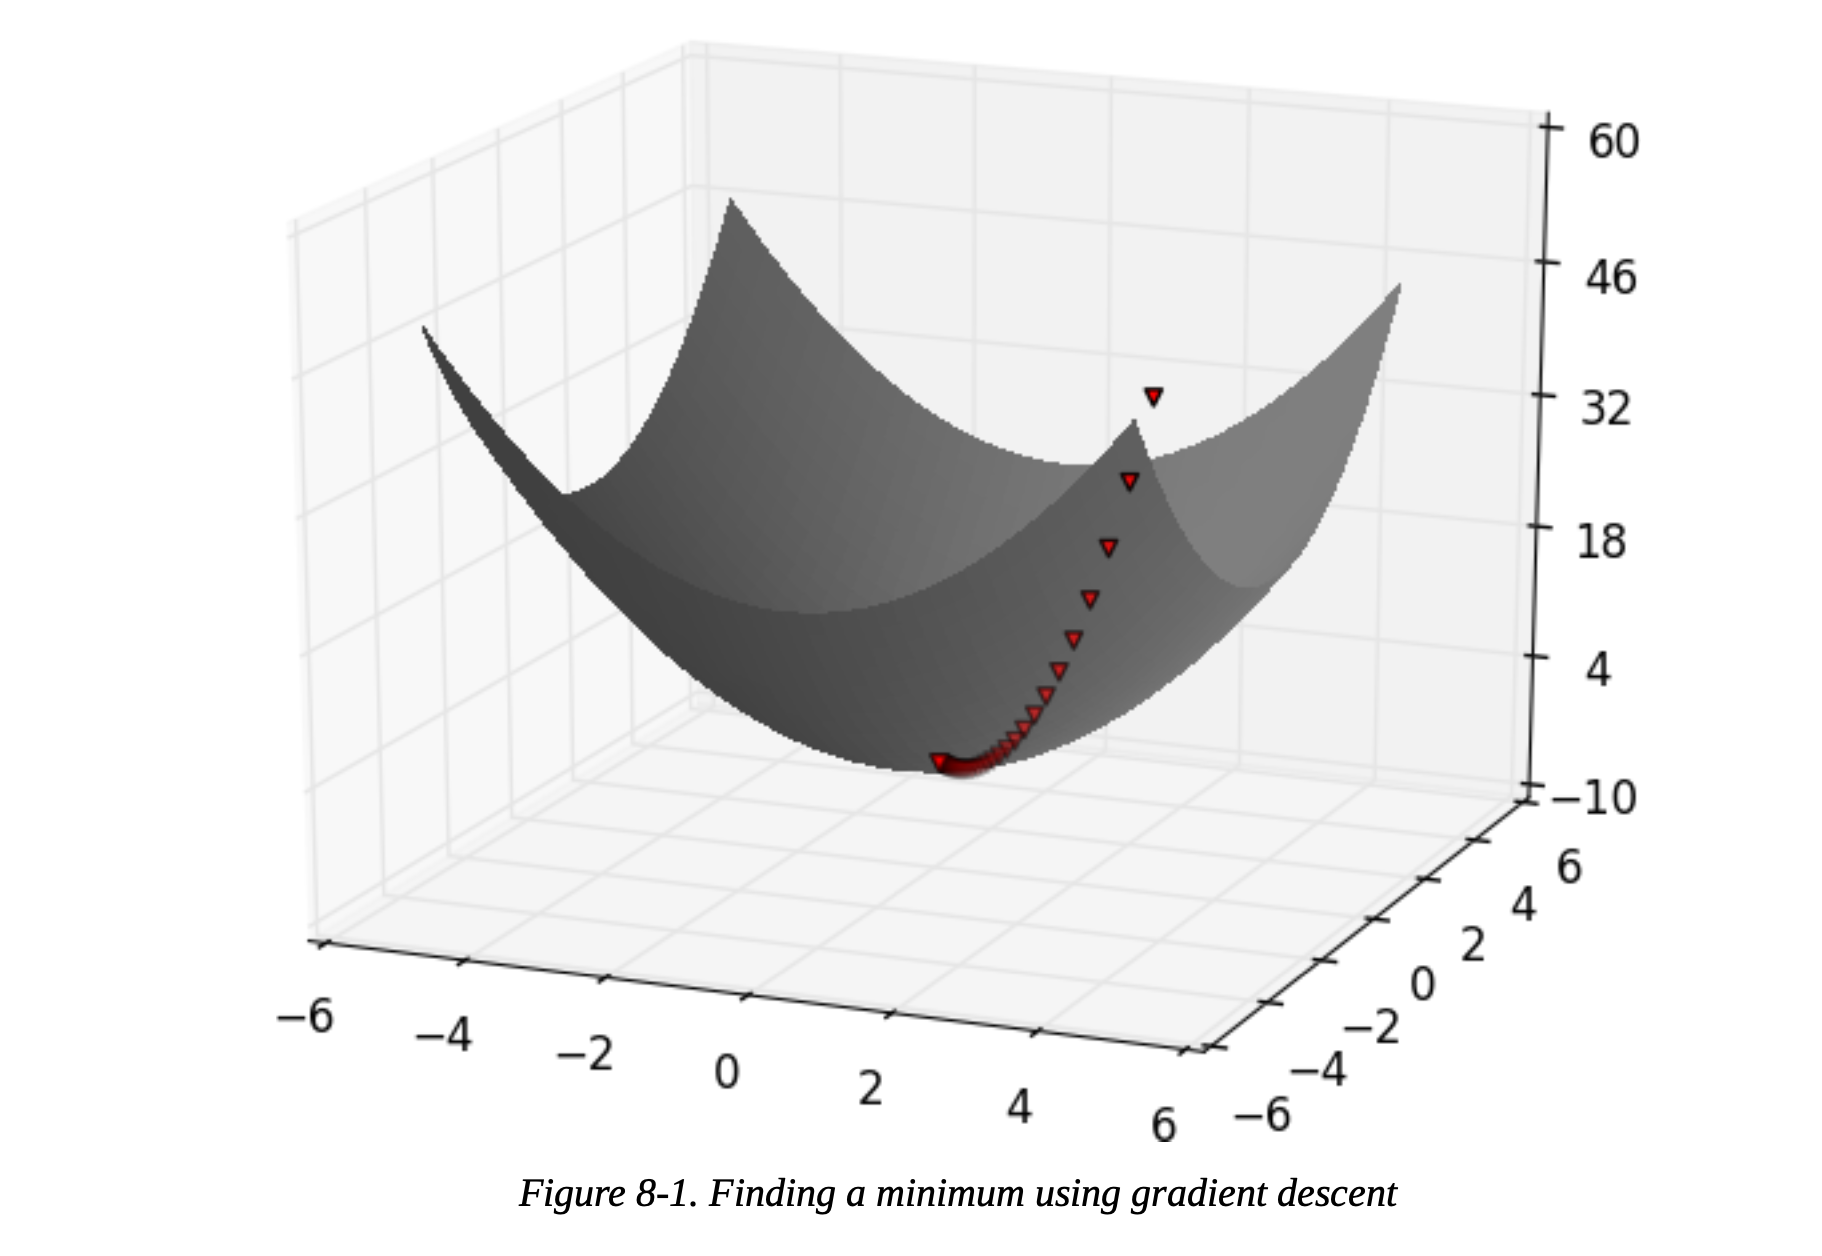

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['figure.dpi'] = 200

In [1]:
from scratch.linear_algebra import Vector, dot

def sum_of_squares(v:Vector) -> float:
    return dot(v,v)
# computes the sum of the squared elements in v

In [3]:
sum_of_squares([2,4])

20

## Estimating the Gradient

In [5]:
from typing import  Callable

def difference_quotient(f:Callable[[float], float], x:float, h:float) -> float:
    return (f(x+h) - f(x)) / h 

In [18]:
def f(x:float) -> float:
    return x**2

In [20]:
difference_quotient(f= f, x = 3, h= 0.001)

6.000999999999479

<font color = 'orange'> consistent with our apporach of derivative for finding slope

## Derivatives by difference quotients 

    Estimating derivative by python

In [5]:
import numpy as np

In [9]:
def difference_quotient(f, x,h):
    return (f(x+h) - f(x))/h

def square(x):
    return x**2

def derivative(x):
    return 2*x

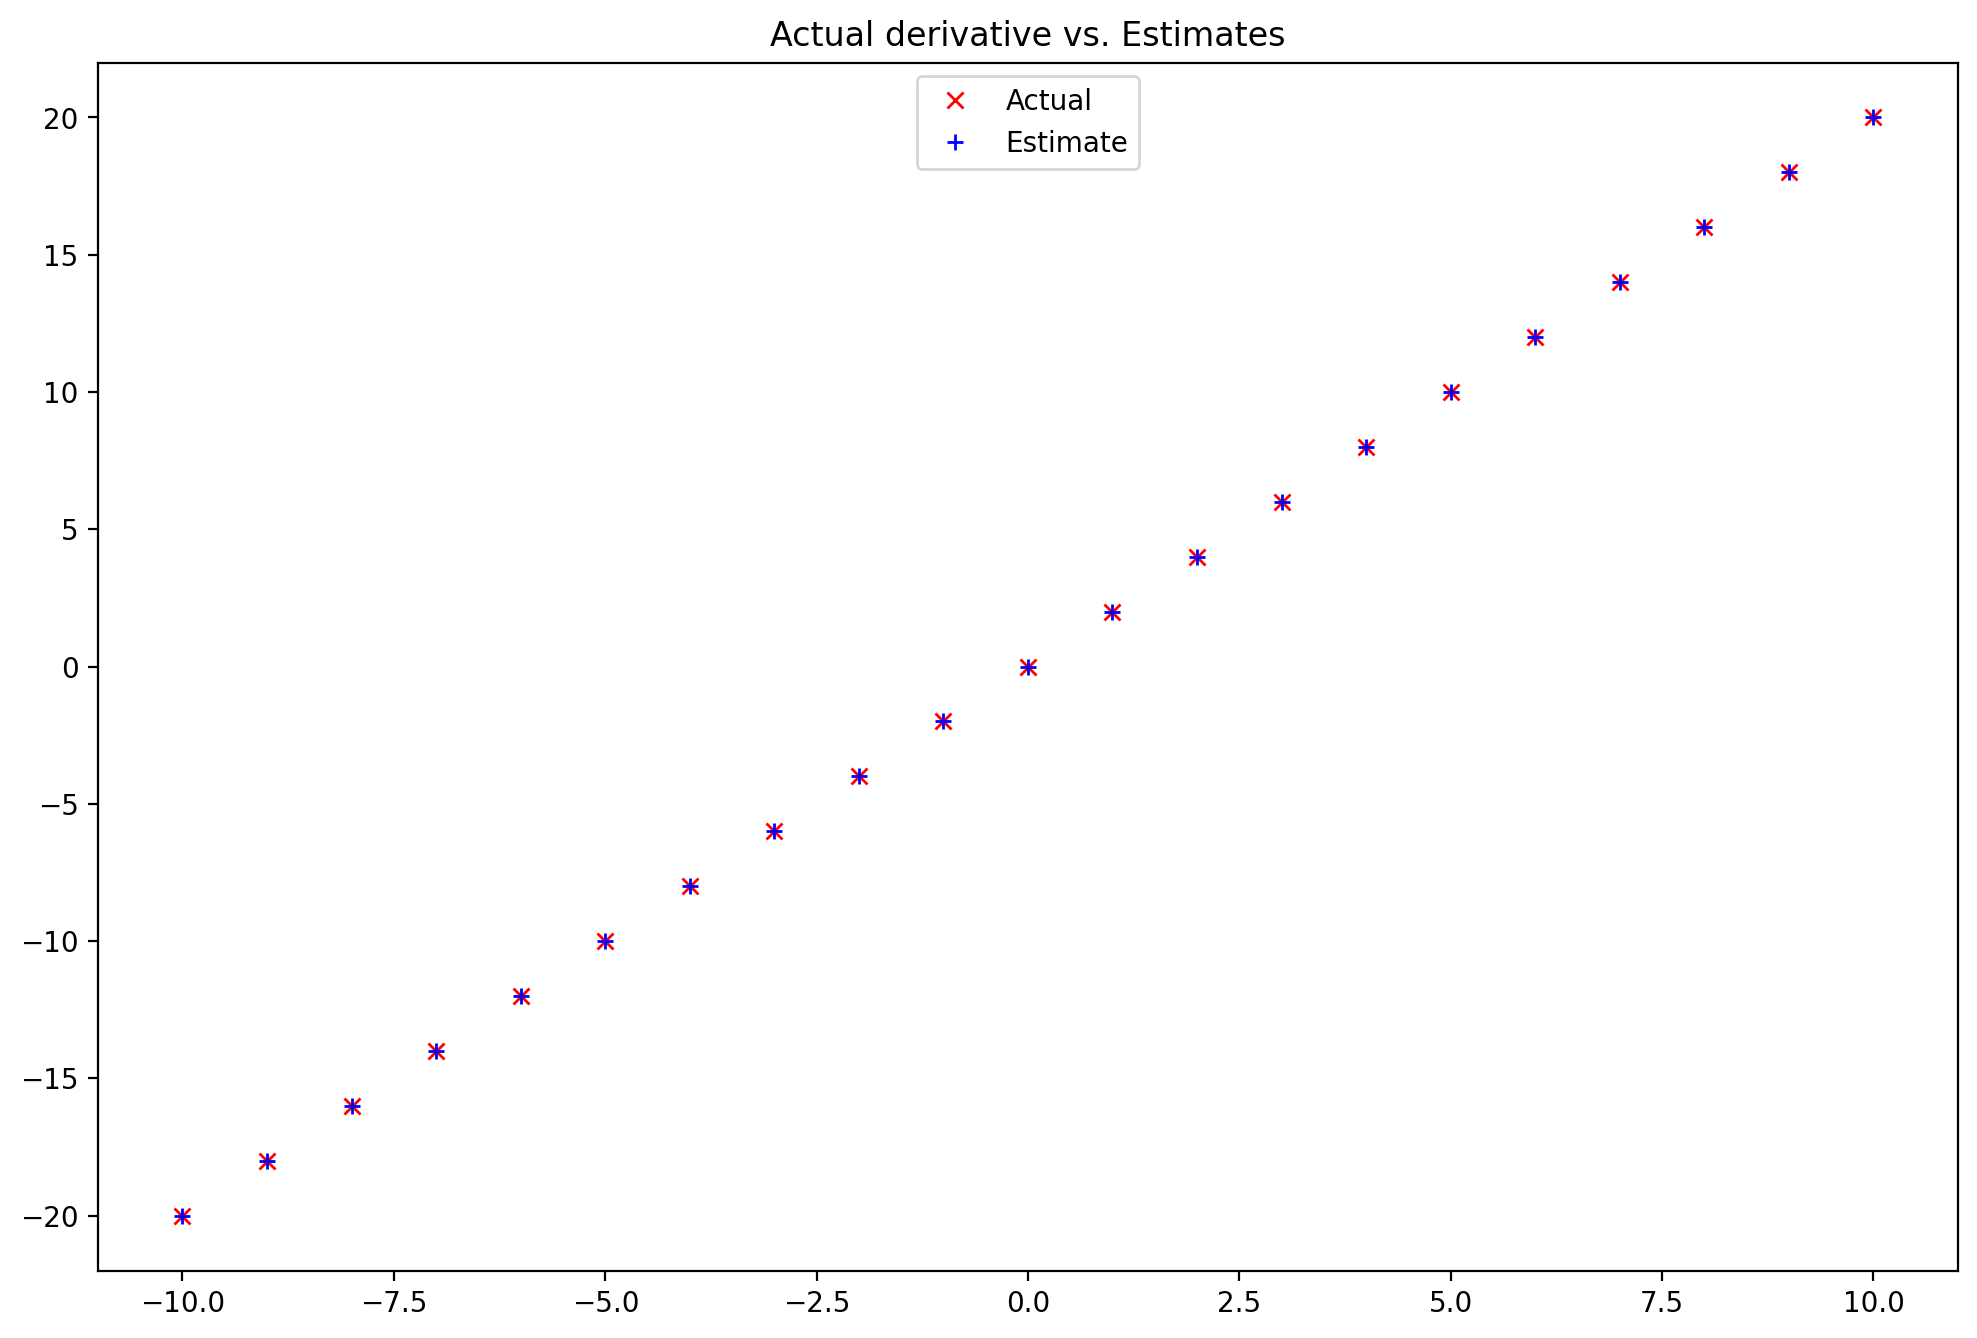

In [25]:
xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x , h= 0.001) for x in xs]

import matplotlib.pyplot as plt

plt.title('Actual derivative vs. Estimates')
plt.plot(xs, actuals, 'rx', label = 'Actual')
plt.plot(xs, estimates, 'b+', label = 'Estimate')
plt.legend(loc = 9)
plt.show()

In [26]:
def partial_difference_quotient(f:Callable[[Vector], float],v:Vector, i:int,h:float) -> float:
    # return the i-th partial difference quotient of f at v

    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    # adding h to just ith element of V
    
    return (f(w) - f(v)) / h 


In [27]:
# Estimating gradient now
# This is computationally expensive

def estimate_gradient(f: Callable[[Vector],float],v:Vector, h:float= 0.001):
    return  [partial_difference_quotient(f,v,i,h) for i in range(len(v))]

### Gradient Mathematically

In [29]:
from scratch.linear_algebra import distance,add,scalar_multiply, Vector
import random

def gradient_step(v:Vector, gradient:Vector, step_size: float) -> Vector:
    # move step size in gradient direction from v
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size,gradient)
    return add(v, step)

def sum_of_squares_gradient(v:Vector) -> Vector:
    return [2* v_i for v_i in v]

# picking a random start point in vector
v = [random.uniform(-10,10) for i in range(3)]

for epoch in range(10000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch,v)
    
assert distance(v, [0,0,0]) < 0.001

# should be close to zero more we run


0 [-3.7317044799315227, 5.565431975532892, 7.970051867021267]
1 [-3.6570703903328923, 5.454123336022234, 7.810650829680841]
2 [-3.5839289825262344, 5.34504086930179, 7.654437813087225]
3 [-3.5122504028757096, 5.238140051915754, 7.501349056825481]
4 [-3.4420053948181955, 5.133377250877439, 7.351322075688971]
5 [-3.3731652869218314, 5.03070970585989, 7.204295634175192]
6 [-3.3057019811833945, 4.930095511742692, 7.060209721491688]
7 [-3.239587941559727, 4.831493601507838, 6.919005527061854]
8 [-3.1747961827285325, 4.734863729477682, 6.780625416520617]
9 [-3.111300259073962, 4.640166454888128, 6.645012908190204]
10 [-3.0490742538924827, 4.5473631257903655, 6.5121126500264]
11 [-2.988092768814633, 4.456415863274558, 6.381870397025872]
12 [-2.92833091343834, 4.367287546009067, 6.254232989085354]
13 [-2.869764295169573, 4.279941795088886, 6.129148329303647]
14 [-2.812369009266182, 4.194342959187108, 6.006565362717574]
15 [-2.7561216290808583, 4.110456100003366, 5.886434055463223]
16 [-2.70099

## Choosing the right step size
    we’ll have some dataset and some (hypothesized) model for the data that depends (in a differentiable way) on one or more parameters. We’ll also have a loss function that measures how well the model fits our data. (Smaller is better.)


In [12]:
# x ranges from -50 to 49 , y is always 20 * x + 5
inputs = [(x, 20*x + 5) for x in range(-50,49)]

using gradient descent to find slope and intercept that minimizes the average squared error



In [14]:
def linear_gradient(x:float, y:float, theta:Vector) -> Vector:
    '''The prediction of the model. Error is predicted
    by `error` and further minimising the squared error by its gradient'''
    
    slope, intercept = theta
    predicted = slope*x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

    1. Start with a random value for `theta`.
    2. Compute the mean of the gradients.
    3. Adjust in that direction.
    4. Repeat.

In [16]:
from scratch.linear_algebra import vector_mean

# start with random values for slope and intercept
theta = [random.uniform(-1,1), random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(5000):
    # computing mean of gradients
    grad = vector_mean([linear_gradient(x,y,theta) for x,y in inputs])
    # taking a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
    slope, intercept = theta
    
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

0 [32.95067291923549, 0.17454539547321501]
1 [11.762354896103336, 0.21009765052073964]
2 [25.224070717976723, 0.20320216501190483]
3 [16.671380141508813, 0.22324390211783446]
4 [22.10522963789897, 0.22614017459661642]
5 [18.652929717070716, 0.23989835352322117]
6 [20.846318449794783, 0.24672441625031616]
7 [19.45279912706288, 0.2579236043174051]
8 [20.338170801814684, 0.266313355362896]
9 [19.775681443957797, 0.27645707025579963]
10 [20.133069970079326, 0.28545551900320365]
11 [19.90602712338094, 0.2951507479053559]
12 [20.050294402441118, 0.30437250065630705]
13 [19.958655034650388, 0.31386434445987665]
14 [20.01689556334104, 0.3231539258402577]
15 [19.97991199327567, 0.33254140911525926]
16 [20.00342766309042, 0.34183615028358005]
17 [19.988505963683785, 0.3511593333091937]
18 [19.998004863072854, 0.3604340265699429]
19 [19.99198844504752, 0.36970916824294875]
20 [19.995829426249628, 0.3789537267965579]
21 [19.99340761197633, 0.38818747819546406]
22 [19.994964738814097, 0.39739791846

# <font color = 'brown'>Minibatch and Stochastic Gradient Descent

In [20]:
import random
from typing import TypeVar, List, Iterator

T  = TypeVar("T")
# allows us to type generic functions

def minibatch(dataset:List[T],batch_size: int, shuffle:bool = True) -> Iterator[List[T]]:
    # generates batch_size sized minibatches from dataset

    batch_start  = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_start)
    # shuffling the batches
    for start in batch_start:
        end = start + batch_size
        yield dataset[start:end]

In [23]:
# Minibatch gradient descent example
    
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
for epoch in range(1000):
    for batch in minibatch(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"
    

0 [17.912548430038097, -0.6554239163883782]
1 [20.21780994612329, -0.5513964297145715]
2 [20.35627552487415, -0.5141958613101021]
3 [20.885843370559876, -0.36775345991524866]
4 [19.53296952713423, -0.285451772699719]
5 [19.72775923885213, -0.24441417215133426]
6 [19.776190814832162, -0.24370865447392573]
7 [21.00307115888231, -0.17936953527350777]
8 [19.770114179108305, -0.15493917849255615]
9 [19.937247834693817, -0.1532541852072823]
10 [19.796745053102377, -0.10645172104677592]
11 [20.32989840588537, -0.08254598335490822]
12 [20.335850500147032, -0.05216472550540502]
13 [17.902116978142253, 0.06902154926279946]
14 [20.0228801942535, 0.5201860800886362]
15 [20.000874471925034, 0.7204472260775077]
16 [18.09422264724598, 0.8363452666497263]
17 [19.422132745824136, 0.8125227817741246]
18 [21.652911772373276, 0.899551351549568]
19 [20.881597187066966, 0.8799468188955122]
20 [20.19445071954457, 1.3761428904601505]
21 [18.499385286506026, 1.4657645164160462]
22 [21.28361866405321, 1.4949632

    Another variation is stochastic gradient descent, in which you take gradient steps based on one training example at a time

In [25]:
# Stochastic gradient descent example
    
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.122404741982464, -0.9734709546346295]
1 [20.11715140992304, -0.7170950123907271]
2 [20.112123379854136, -0.4717224893135275]
3 [20.107311143684946, -0.23688113197278032]
4 [20.102705447395103, -0.012118952358195366]
5 [20.098297421842872, 0.2029966387440224]
6 [20.09407858605478, 0.40887966412017157]
7 [20.09004082239112, 0.6059263772333076]
8 [20.086176348314122, 0.7945160244284237]
9 [20.082477743315604, 0.9750115753968496]
10 [20.07893787078743, 1.1477604213598924]
11 [20.075549929954146, 1.3130950437756692]
12 [20.07230739086757, 1.4713336543459137]
13 [20.069204026726176, 1.6227808075476178]
14 [20.06623385576639, 1.7677279866408857]
15 [20.06339115441031, 1.9064541644756146]
16 [20.060670464406385, 2.0392263407482334]
17 [20.05806654591014, 2.166300055933245]
18 [20.055574381265505, 2.287919882749322]
19 [20.053189180248697, 2.4043198970956]
20 [20.050906347268874, 2.515724128578347]
21 [20.048721492404713, 2.6223469916201023]
22 [20.046630411241985, 2.724393698275437]
23 [